# Exploratory data analysis(EDA)

# libraries

In [1]:
# Importing Pandas (for data manipulation and analysis)
import pandas as pd

# Importing NumPy (for numerical computing and array operations)
import numpy as np

# Importing Matplotlib (for data visualization and plotting)
import matplotlib.pyplot as plt

# Importing Seaborn (for advanced data visualization and statistical graphics)
import seaborn as sns


# A quick look at the dataset.

In [2]:
#Load the dataset into a pandas dataframe

df = pd.read_excel('Data_Pathrise .xlsx')


In [3]:
df.head()


,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [4]:
print(df.shape)


(2544, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

<AxesSubplot:xlabel='placed', ylabel='count'>

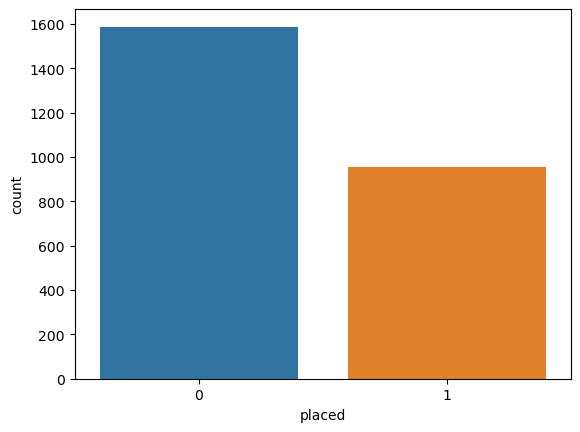

In [6]:
#To check the dataset balance
sns.countplot(x='placed',data=df)

In [7]:
#Get a summary of the basic statistics of the numerical variables

df.describe()


,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


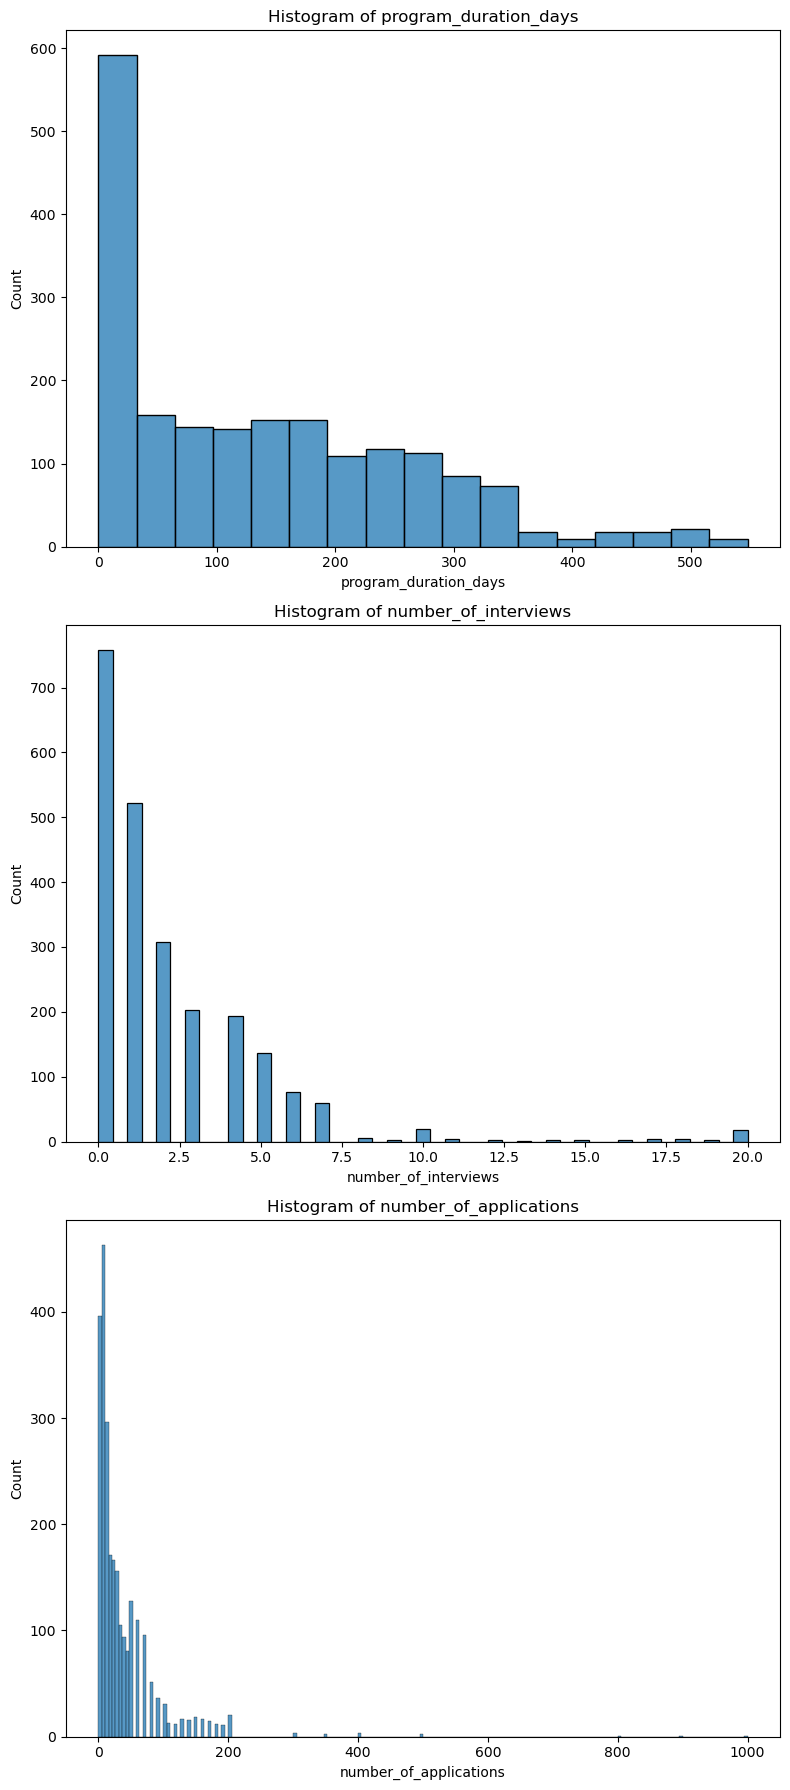

In [8]:

numeric_columns=['program_duration_days','number_of_interviews','number_of_applications']
num_plots = len(numeric_columns)

fig, axes = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

# Use loop to create histogram for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_title(f"Histogram of {column}")

plt.tight_layout()
plt.show()



C:\Users\Elham\AppData\Local\Temp\ipykernel_11604\626375195.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


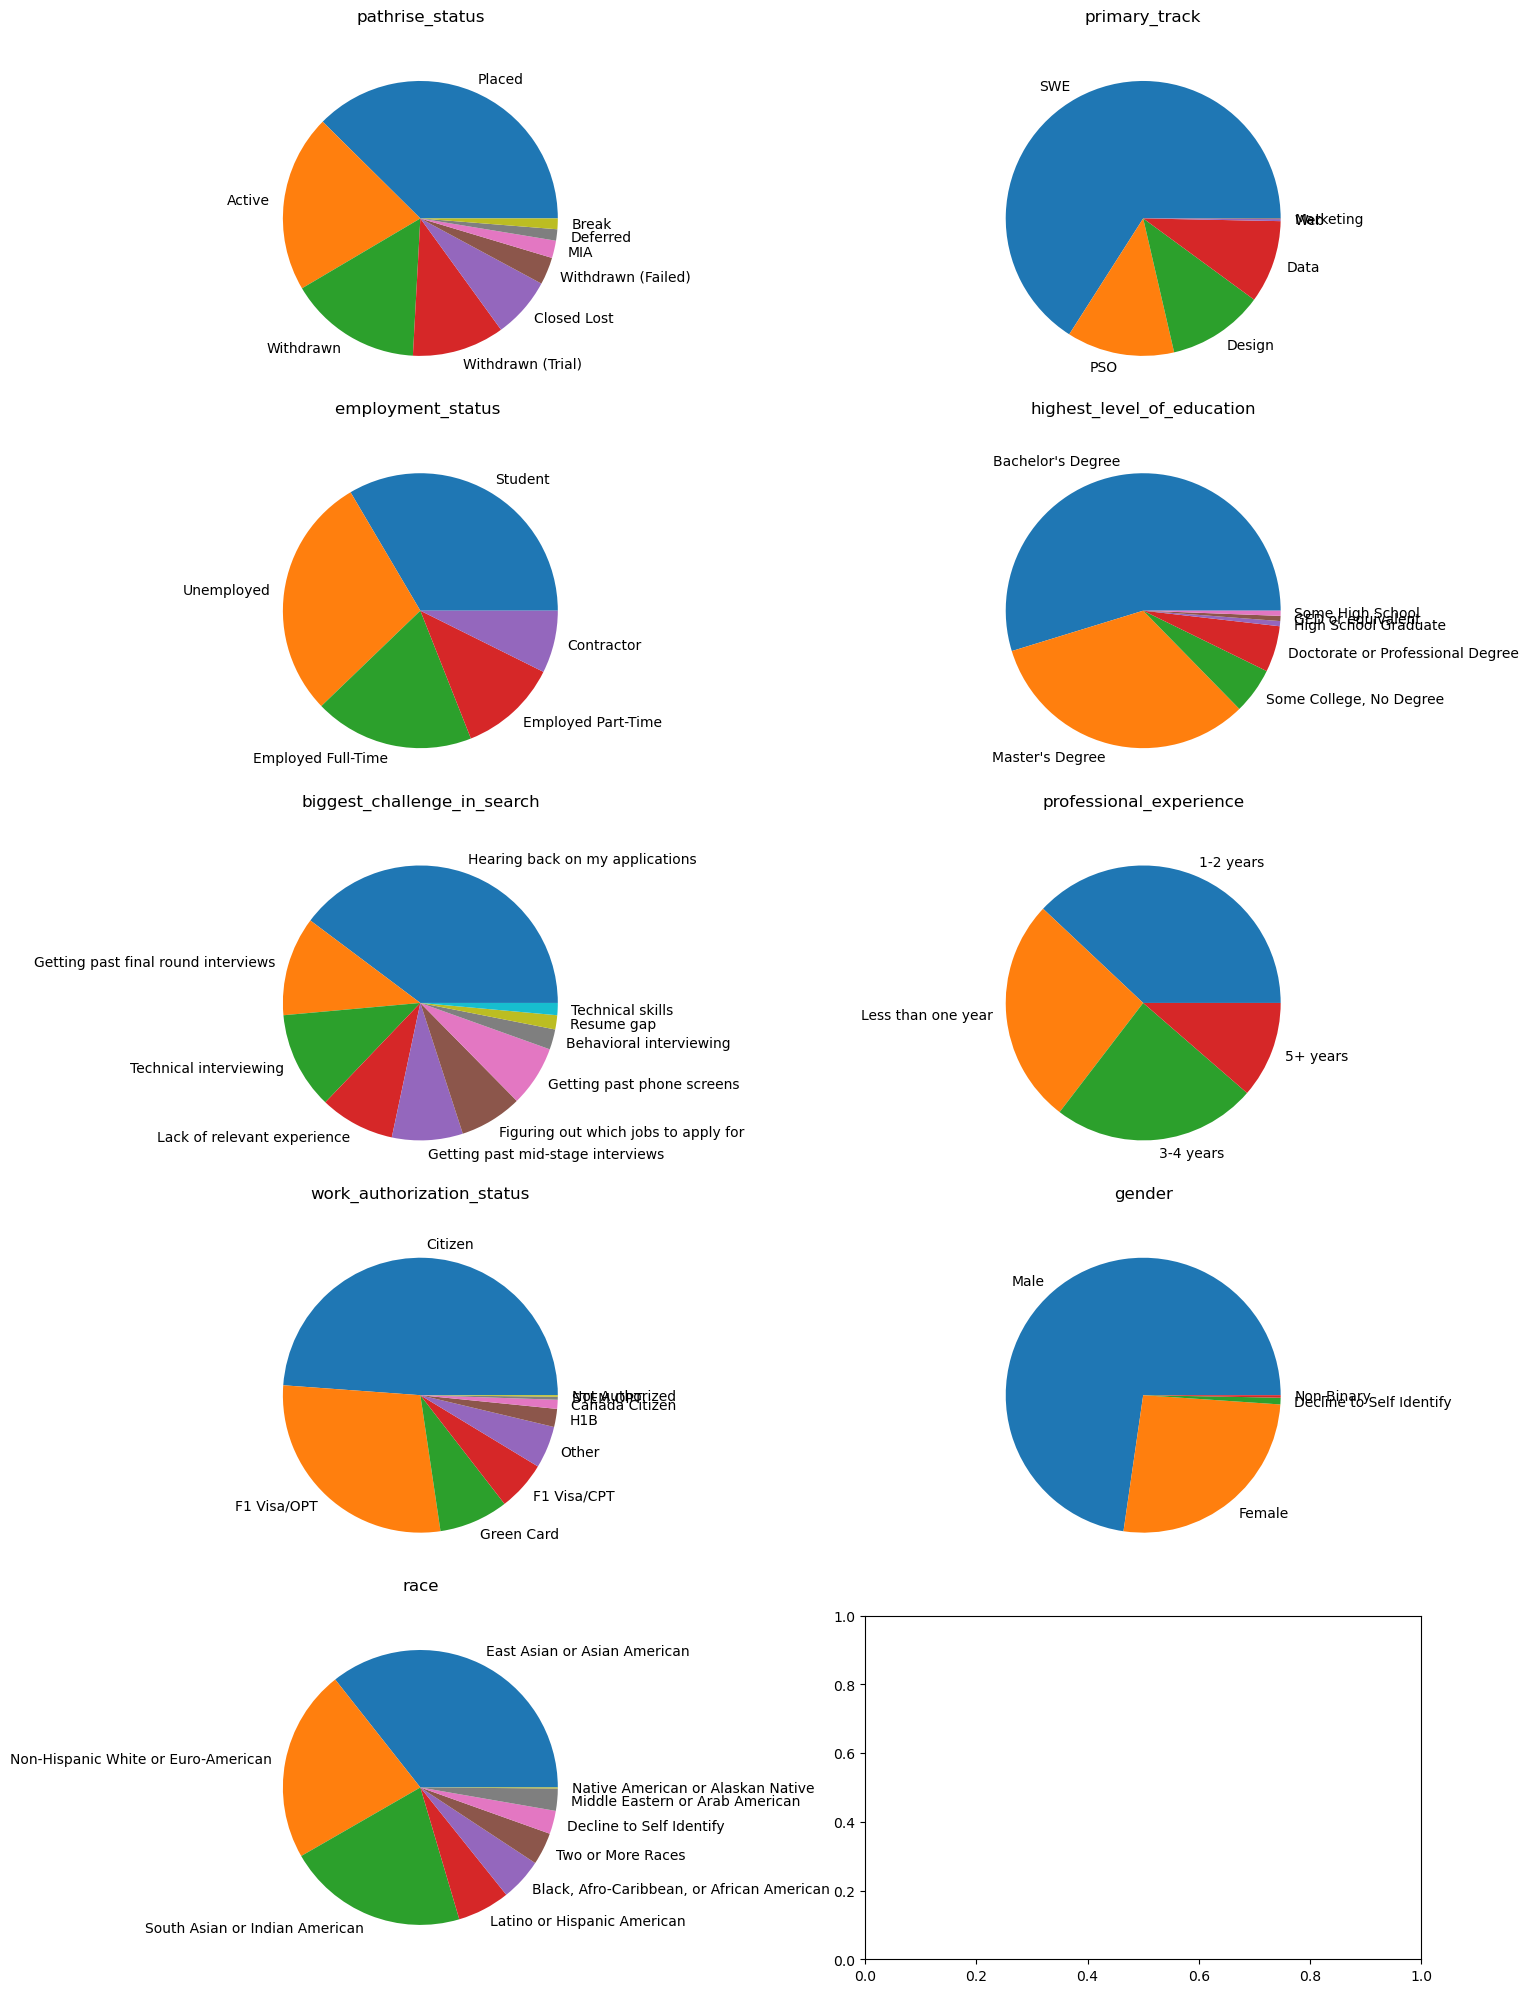

In [9]:
# The following line enables interactive plots in Jupyter notebooks
#%matplotlib notebook

# Define a list of column names for which we will be creating pie charts
columns = ['pathrise_status', 'primary_track', 'employment_status ',
           'highest_level_of_education', 'biggest_challenge_in_search',
           'professional_experience', 'work_authorization_status', 'gender', 'race']

# Determine the number of figures needed to display all columns
num_figs = len(columns)
num_cols_per_fig = 2
num_rows_per_fig = num_figs // num_cols_per_fig + 1

# Create empty lists to store the figures and axes
figs = []
axes = []

# Iterate over all the columns and create pie charts for each
for i in range(num_figs):
    # Check if we need to create a new figure
    if i % (num_cols_per_fig * num_rows_per_fig) == 0:
        fig, axs = plt.subplots(num_rows_per_fig, num_cols_per_fig, figsize=(15, 20))
        figs.append(fig)
        axes.append(axs)

    # Calculate the indices of the current row and column in the grid of subplots
    fig_index = i // (num_cols_per_fig * num_rows_per_fig)
    row_index = (i - fig_index * num_cols_per_fig * num_rows_per_fig) // num_cols_per_fig
    col_index = i % num_cols_per_fig

    # Get the current axis object
    axs = axes[fig_index]
    ax = axs[row_index, col_index]

    # Create a pie chart for the current column
    data_counts = df[columns[i]].value_counts()
    ax.pie(data_counts.values, labels=data_counts.index)
    ax.set_title(columns[i], y=1.05)

# Adjust the layout and display all the figures
for fig in figs:
    fig.tight_layout()
    fig.show()




# Data Cleaning

<strong>During this step, <strong>251<strong> rows were eliminated from the dataset as they contained either duplicate or outlier data.<strong>

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

df_cleaned = df[~outliers]

# Print original and cleaned dataset shape
print("Original Shape:", df.shape)
print("Cleaned Shape:", df_cleaned.shape)

Original Shape: (2544, 16)
Cleaned Shape: (2293, 16)


C:\Users\Elham\AppData\Local\Temp\ipykernel_11604\311196983.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


# creating new columns and removing unnecessary rows and columns.

<strong>After removing some rows that contained incorrect information based on the 'pathrise_status' column, we extracted two new columns, 'cohort_tag_month' and 'cohort_tag_fortnight', from the 'cohort_tag' column. then,the columns 'pathrise_status', 'cohort_tag', 'id', and 'program_duration_days' were droped from dataframe.<strong>

In [12]:
# Dropping Rows from a DataFrame based on Specific Conditions
df.drop(df[(df['pathrise_status'] == 'Active') | (df['pathrise_status'] == 'Deferred')].index, axis=0, inplace=True)
df.drop(df[(df['pathrise_status'] == 'MIA') | (df['pathrise_status'] == 'Break')].index, axis=0,  inplace=True)


In [13]:
df.shape

(1894, 16)

In [14]:
## extract first 3 and last characters into separate columns
df['cohort_tag_month'] = ''
df['cohort_tag_fortnight'] = ''
df['cohort_tag_month'] = df['cohort_tag'].str[:3]
df['cohort_tag_fortnight'] = df['cohort_tag'].str[-1]


In [15]:
df.shape

(1894, 18)

In [16]:
# drop unnecessary columns
df.drop(['pathrise_status', 'cohort_tag', 'id', 'program_duration_days'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1894 non-null   object 
 1   placed                       1894 non-null   int64  
 2   employment_status            1717 non-null   object 
 3   highest_level_of_education   1854 non-null   object 
 4   length_of_job_search         1829 non-null   object 
 5   biggest_challenge_in_search  1874 non-null   object 
 6   professional_experience      1738 non-null   object 
 7   work_authorization_status    1674 non-null   object 
 8   number_of_interviews         1723 non-null   float64
 9   number_of_applications       1894 non-null   int64  
 10  gender                       1527 non-null   object 
 11  race                         1881 non-null   object 
 12  cohort_tag_month             1888 non-null   object 
 13  cohort_tag_fortnig

# Management of missing values

<strong>First, I drew a count plot to see the distribution of each category. Then, I plotted a chart based on missing values to see how the distribution of missing values is related to the target. . By comparing these plots, we can determine whether these variations may bias our analysis or not.<strong>

In [17]:
# Identify missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

primary_track                    0
placed                           0
employment_status              177
highest_level_of_education      40
length_of_job_search            65
biggest_challenge_in_search     20
professional_experience        156
work_authorization_status      220
number_of_interviews           171
number_of_applications           0
gender                         367
race                            13
cohort_tag_month                 6
cohort_tag_fortnight             6
dtype: int64


<strong>employment_status<strong>

<strong>Replace missing values in the 'employment_status' column with 'Student'<strong>

In [18]:
df['employment_status '].value_counts()

Student               567
Unemployed            493
Employed Full-Time    325
Employed Part-Time    199
Contractor            133
Name: employment_status , dtype: int64

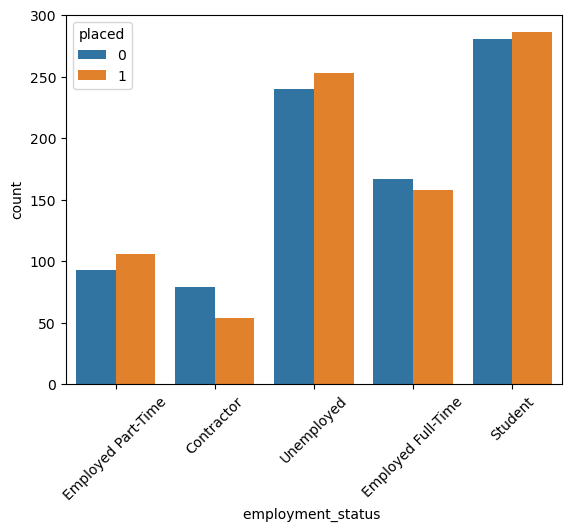

In [19]:
sns.countplot(x='employment_status ',data=df,hue='placed')
plt.xticks(rotation=45)
plt.show()

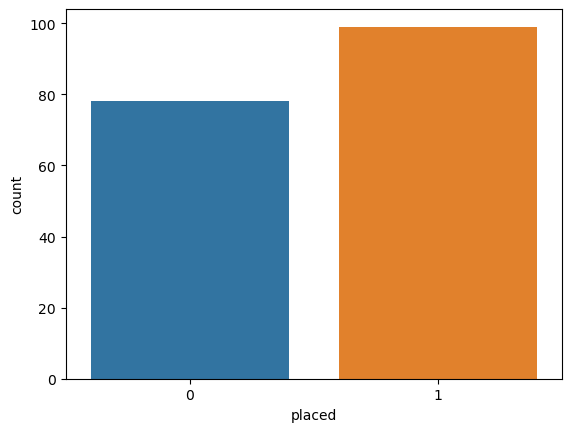

In [20]:
#Create a new DataFrame called missing_values_df that contains only rows where the 'employment_status' column is missing/null.
missing_values_df = df[df['employment_status '].isnull()]

# Use Seaborn's countplot to plot the frequency of each value in the 'placed' column, for the missing values DataFrame.
sns.countplot(x='placed', data=missing_values_df)
plt.show()


In [21]:
# Replace missing values in the 'employment_status' column with 'Student'
df['employment_status '].replace(np.nan, 'Student', inplace=True)

# Count the number of occurrences of each value in the 'employment_status' column
value_counts = df['employment_status '].value_counts()
print(value_counts)


Student               744
Unemployed            493
Employed Full-Time    325
Employed Part-Time    199
Contractor            133
Name: employment_status , dtype: int64


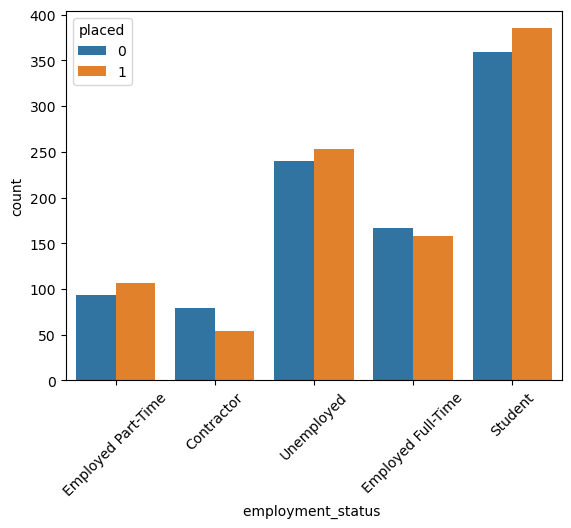

In [22]:
sns.countplot(x='employment_status ',data=df,hue='placed')
plt.xticks(rotation=45)
plt.show()

<strong>highest_level_of_education<strong>

<strong>Replace missing values in the 'highest_level_of_education' column with "Master's Degree"<strong>

In [23]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1015
Master's Degree                      599
Some College, No Degree              101
Doctorate or Professional Degree     100
GED or equivalent                     14
Some High School                      13
High School Graduate                  12
Name: highest_level_of_education, dtype: int64

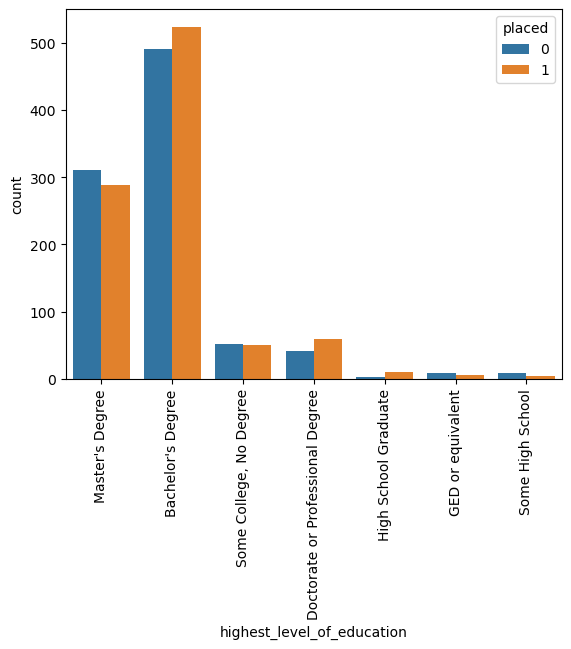

In [24]:
sns.countplot(x='highest_level_of_education',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

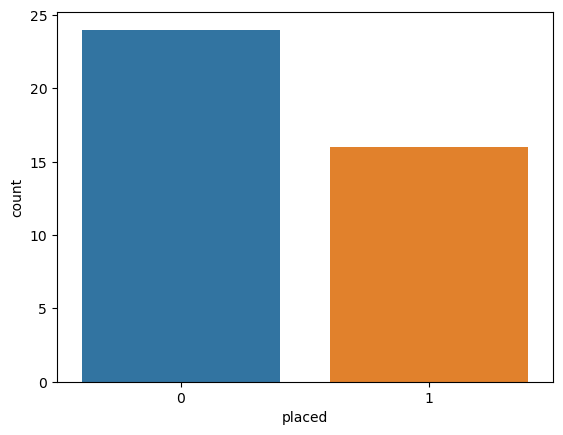

In [25]:
#Create a new DataFrame called missing_values_df that contains only rows where the 'employment_status' column is missing/null.
missing_values_df = df[df['highest_level_of_education'].isnull()]

# Use Seaborn's countplot to plot the frequency of each value in the 'placed' column, for the missing values DataFrame.
sns.countplot(x='placed', data=missing_values_df)
plt.show()


In [26]:
# Replace missing values in the 'highest_level_of_education' column with "Master's Degree"
df['highest_level_of_education'].replace(np.nan, "Master's Degree", inplace=True)

# Count the number of occurrences of each value in the 'highest_level_of_education' column
value_counts = df['highest_level_of_education'].value_counts()
print(value_counts)

Bachelor's Degree                   1015
Master's Degree                      639
Some College, No Degree              101
Doctorate or Professional Degree     100
GED or equivalent                     14
Some High School                      13
High School Graduate                  12
Name: highest_level_of_education, dtype: int64


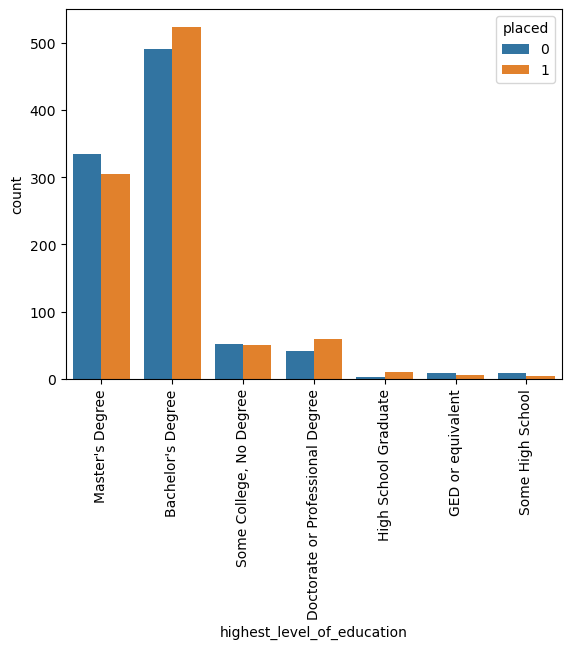

In [27]:
sns.countplot(x='highest_level_of_education',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>length_of_job_search<strong>

<strong>Replace missing values in the 'length_of_job_search' column with '1-2 months'.<strong>

In [28]:
df['length_of_job_search'].value_counts()

Less than one month    610
1-2 months             594
3-5 months             368
6 months to a year     169
Over a year             88
Name: length_of_job_search, dtype: int64

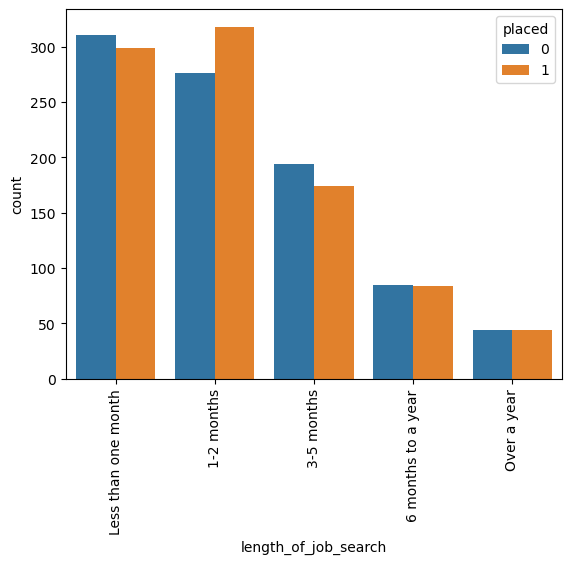

In [29]:
sns.countplot(x='length_of_job_search',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

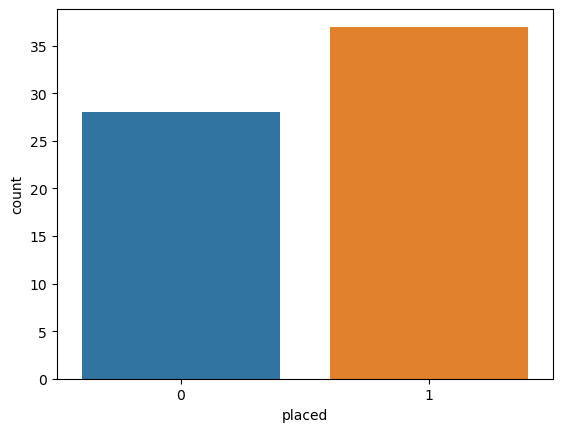

In [30]:
#Create a new DataFrame called missing_values_df that contains only rows where the 'length_of_job_search' column is missing/null.
missing_values_df = df[df['length_of_job_search'].isnull()]

# Use Seaborn's countplot to plot the frequency of each value in the 'placed' column, for the missing values DataFrame.
sns.countplot(x='placed', data=missing_values_df)
plt.show()

In [31]:
# Replace missing values in the 'length_of_job_search' column with '1-2 months'
df['length_of_job_search'].replace(np.nan, "1-2 months", inplace=True)

# Count the number of occurrences of each value in the 'length_of_job_search' column
value_counts = df['length_of_job_search'].value_counts()
print(value_counts)

1-2 months             659
Less than one month    610
3-5 months             368
6 months to a year     169
Over a year             88
Name: length_of_job_search, dtype: int64


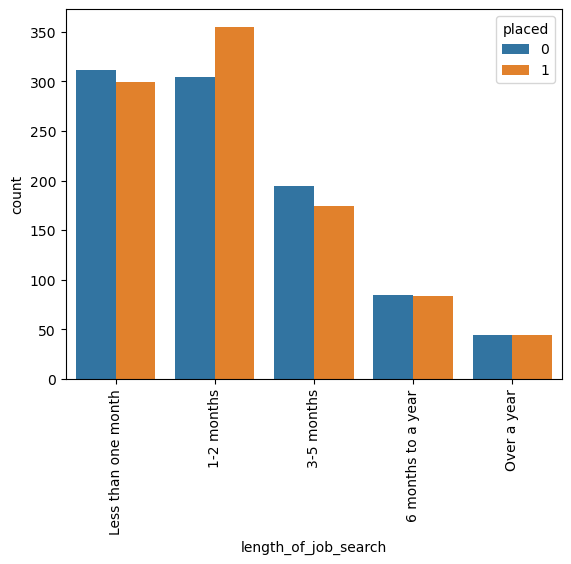

In [32]:
sns.countplot(x='length_of_job_search',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>biggest_challenge_in_search<strong>

<strong> Replace missing values in the 'biggest_challenge_in_search' column with 'Getting past final round interviews'.<strong>

In [33]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         724
Getting past final round interviews     232
Technical interviewing                  219
Lack of relevant experience             173
Getting past mid-stage interviews       158
Getting past phone screens              142
Figuring out which jobs to apply for    129
Behavioral interviewing                  42
Resume gap                               30
Technical skills                         25
Name: biggest_challenge_in_search, dtype: int64

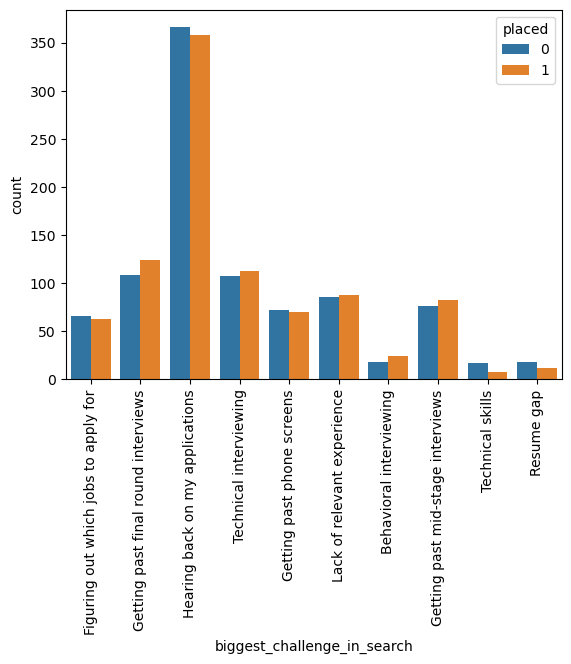

In [34]:
sns.countplot(x='biggest_challenge_in_search',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

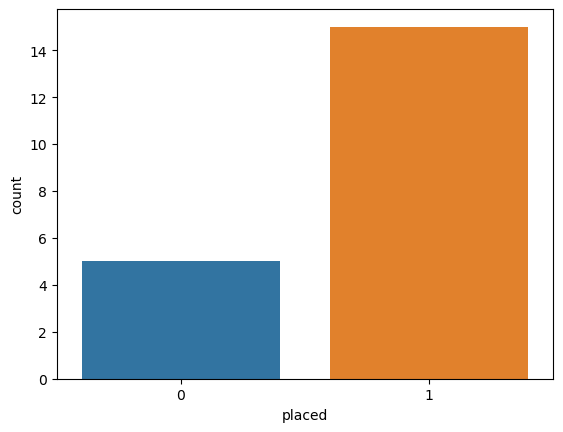

In [35]:
#Create a new DataFrame called missing_values_df that contains only rows where the 'biggest_challenge_in_search' column is missing/null.
missing_values_df = df[df['biggest_challenge_in_search'].isnull()]

# Use Seaborn's countplot to plot the frequency of each value in the 'placed' column, for the missing values DataFrame.
sns.countplot(x='placed', data=missing_values_df)
plt.show()

In [36]:
# Replace missing values in the 'biggest_challenge_in_search' column with 'Getting past final round interviews'
df['biggest_challenge_in_search'].replace(np.nan, "Getting past final round interviews", inplace=True)

# Count the number of occurrences of each value in the 'biggest_challenge_in_search' column
value_counts = df['biggest_challenge_in_search'].value_counts()
print(value_counts)

Hearing back on my applications         724
Getting past final round interviews     252
Technical interviewing                  219
Lack of relevant experience             173
Getting past mid-stage interviews       158
Getting past phone screens              142
Figuring out which jobs to apply for    129
Behavioral interviewing                  42
Resume gap                               30
Technical skills                         25
Name: biggest_challenge_in_search, dtype: int64


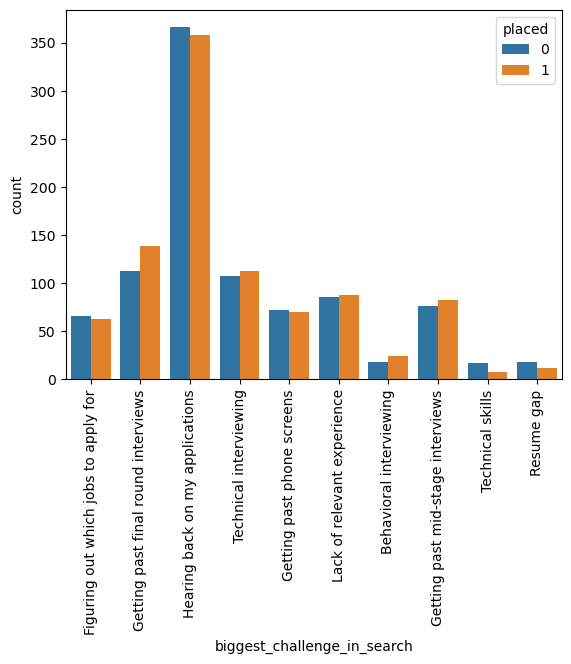

In [37]:
sns.countplot(x='biggest_challenge_in_search',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>professional_experience<strong>

<strong>Replace missing values in the 'professional_experience' column with new category 'Missed': 
Replacing missing values with any category may alter the distribution of the data.<strong>

In [38]:
df['professional_experience'].value_counts()

1-2 years             630
Less than one year    469
3-4 years             438
5+ years              201
Name: professional_experience, dtype: int64

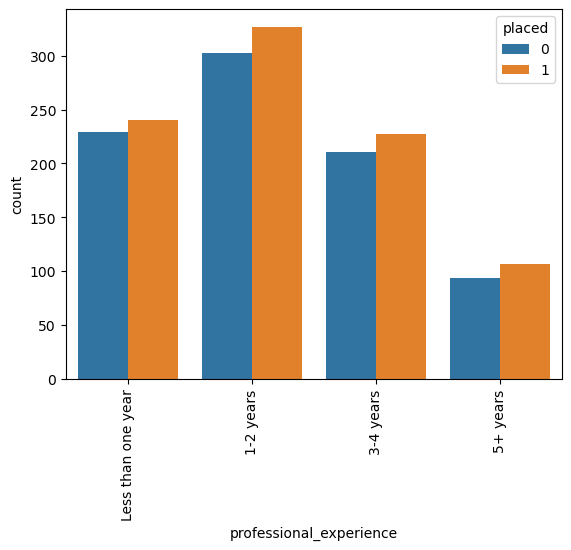

In [39]:
sns.countplot(x='professional_experience',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

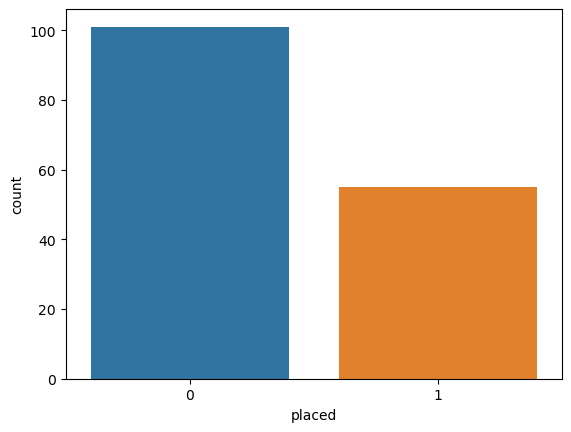

In [40]:
#Create a new DataFrame called missing_values_df that contains only rows where the 'professional_experience' column is missing/null.
missing_values_df = df[df['professional_experience'].isnull()]

# Use Seaborn's countplot to plot the frequency of each value in the 'placed' column, for the missing values DataFrame.
sns.countplot(x='placed', data=missing_values_df)
plt.show()

In [41]:
# Replace missing values in the 'professional_experience' column with new category 'Missed': 
#Replacing missing values with any category may alter the distribution of the data.
df['professional_experience'].fillna('Missed', inplace=True)

# Count the number of occurrences of each value in the 'professional_experience' column
value_counts = df['professional_experience'].value_counts()
print(value_counts)

1-2 years             630
Less than one year    469
3-4 years             438
5+ years              201
Missed                156
Name: professional_experience, dtype: int64


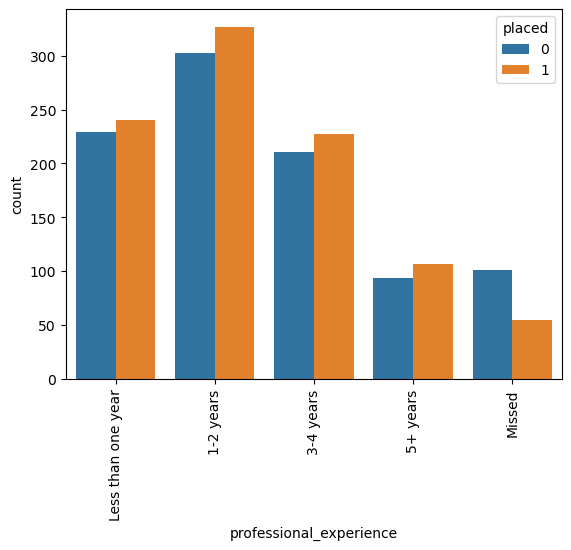

In [42]:
sns.countplot(x='professional_experience',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>work_authorization_status<strong>

<strong>Replace missing values in the 'work_authorization_status' column with 'Citizen'.<strong>

In [43]:
df['work_authorization_status'].value_counts()

Citizen           817
F1 Visa/OPT       478
Green Card        138
F1 Visa/CPT        96
Other              80
H1B                36
Canada Citizen     20
STEM OPT            5
Not Authorized      4
Name: work_authorization_status, dtype: int64

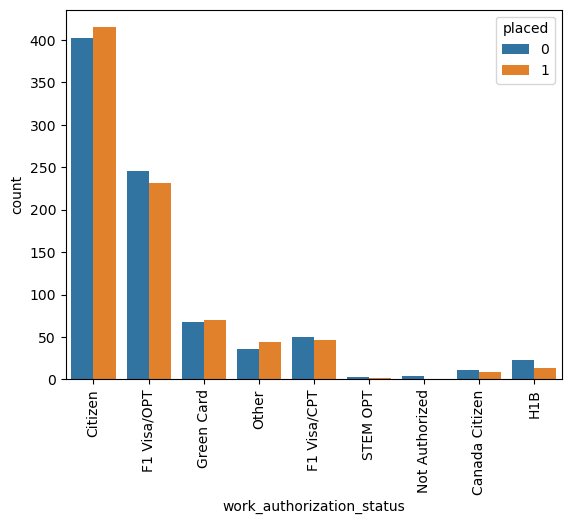

In [44]:
sns.countplot(x='work_authorization_status',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

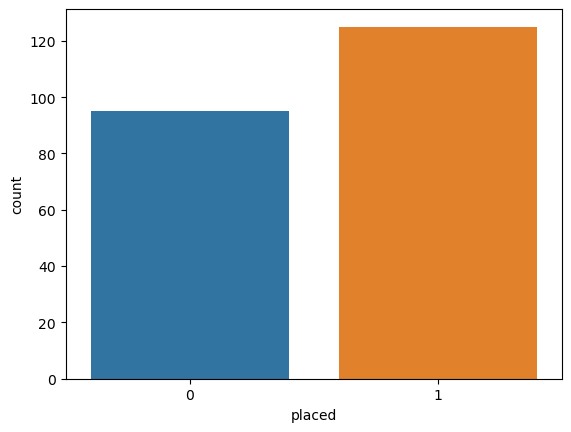

In [45]:
#Create a new DataFrame called missing_values_df that contains only rows where the 'work_authorization_status' column is missing/null.
missing_values_df = df[df['work_authorization_status'].isnull()]

# Use Seaborn's countplot to plot the frequency of each value in the 'placed' column, for the missing values DataFrame.
sns.countplot(x='placed', data=missing_values_df)
plt.show()

In [46]:
# Replace missing values in the 'work_authorization_status' column with 'Citizen'
df['work_authorization_status'].replace(np.nan, "Citizen", inplace=True)

# Count the number of occurrences of each value in the 'work_authorization_status' column
value_counts = df['work_authorization_status'].value_counts()
print(value_counts)

Citizen           1037
F1 Visa/OPT        478
Green Card         138
F1 Visa/CPT         96
Other               80
H1B                 36
Canada Citizen      20
STEM OPT             5
Not Authorized       4
Name: work_authorization_status, dtype: int64


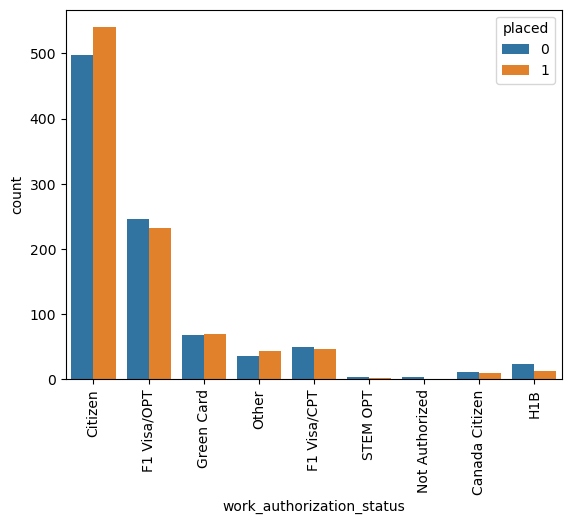

In [47]:
sns.countplot(x='work_authorization_status',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>gender<strong>

<strong>Replace missing values in the 'gender' column with 'Decline to Self Identify'.<strong>

In [48]:
df['gender'].value_counts()

Male                        1114
Female                       400
Decline to Self Identify      10
Non-Binary                     3
Name: gender, dtype: int64

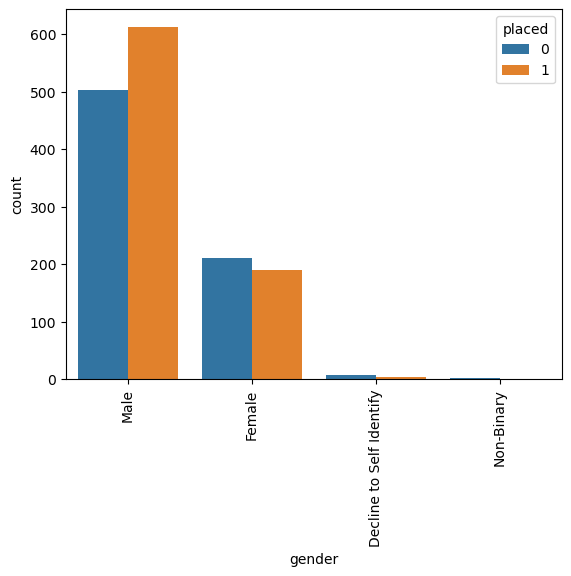

In [49]:
sns.countplot(x='gender',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

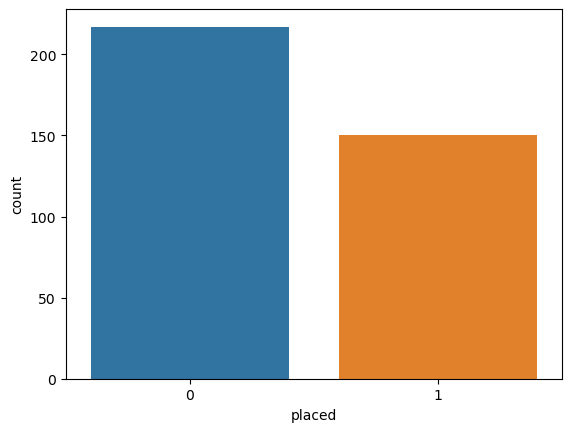

In [50]:
#Create a new DataFrame called missing_values_df that contains only rows where the 'gender' column is missing/null.
missing_values_df = df[df['gender'].isnull()]

# Use Seaborn's countplot to plot the frequency of each value in the 'placed' column, for the missing values DataFrame.
sns.countplot(x='placed', data=missing_values_df)
plt.show()

In [51]:
# Replace missing values in the 'gender' column with 'Decline to Self Identify'
df['gender'].replace(np.nan, "Decline to Self Identify", inplace=True)

# Count the number of occurrences of each value in the 'gender' column
value_counts = df['gender'].value_counts()
print(value_counts)


Male                        1114
Female                       400
Decline to Self Identify     377
Non-Binary                     3
Name: gender, dtype: int64


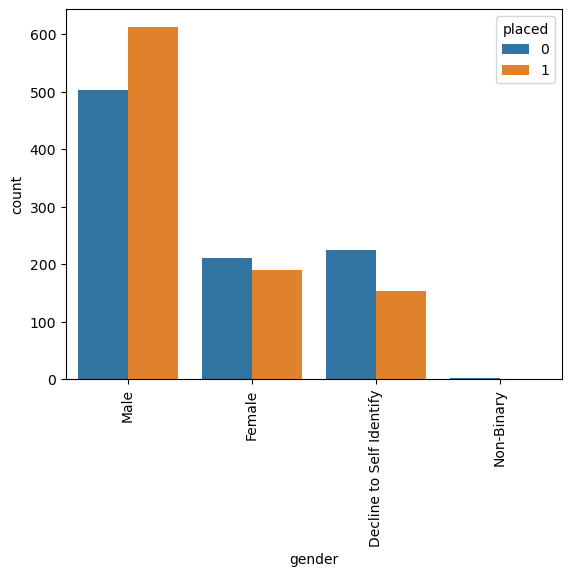

In [52]:
sns.countplot(x='gender',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>race<strong>

<strong>Replace missing values in the 'race' column with 'Decline to Self Identify'.<strong>

In [53]:
df['race'].value_counts()

East Asian or Asian American                  690
South Asian or Indian American                414
Non-Hispanic White or Euro-American           407
Latino or Hispanic American                   119
Black, Afro-Caribbean, or African American     85
Two or More Races                              67
Middle Eastern or Arab American                52
Decline to Self Identify                       44
Native American or Alaskan Native               3
Name: race, dtype: int64

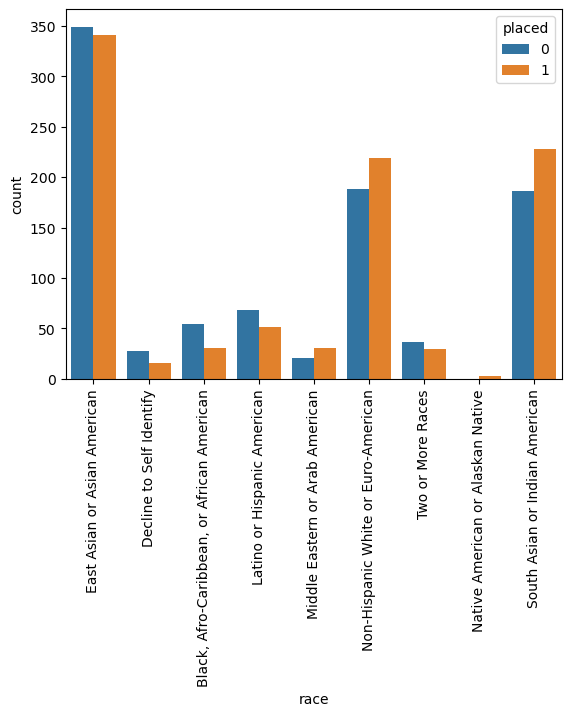

In [54]:
sns.countplot(x='race',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

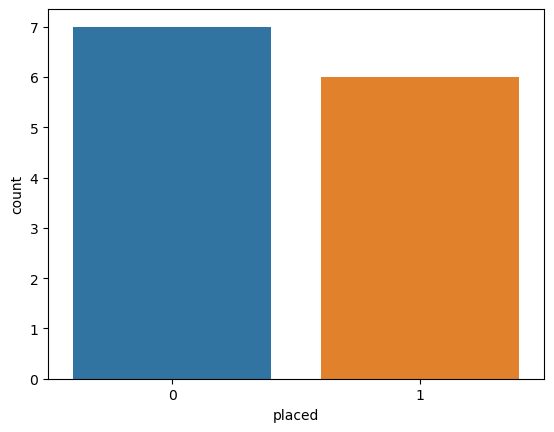

In [55]:
#Create a new DataFrame called missing_values_df that contains only rows where the 'gender' column is missing/null.
missing_values_df = df[df['race'].isnull()]

# Use Seaborn's countplot to plot the frequency of each value in the 'placed' column, for the missing values DataFrame.
sns.countplot(x='placed', data=missing_values_df)
plt.show()

In [56]:
# Replace missing values in the 'race' column with 'Decline to Self Identify'
df['race'].replace(np.nan, "Decline to Self Identify", inplace=True)

# Count the number of occurrences of each value in the 'race' column
value_counts = df['race'].value_counts()
print(value_counts)

East Asian or Asian American                  690
South Asian or Indian American                414
Non-Hispanic White or Euro-American           407
Latino or Hispanic American                   119
Black, Afro-Caribbean, or African American     85
Two or More Races                              67
Decline to Self Identify                       57
Middle Eastern or Arab American                52
Native American or Alaskan Native               3
Name: race, dtype: int64


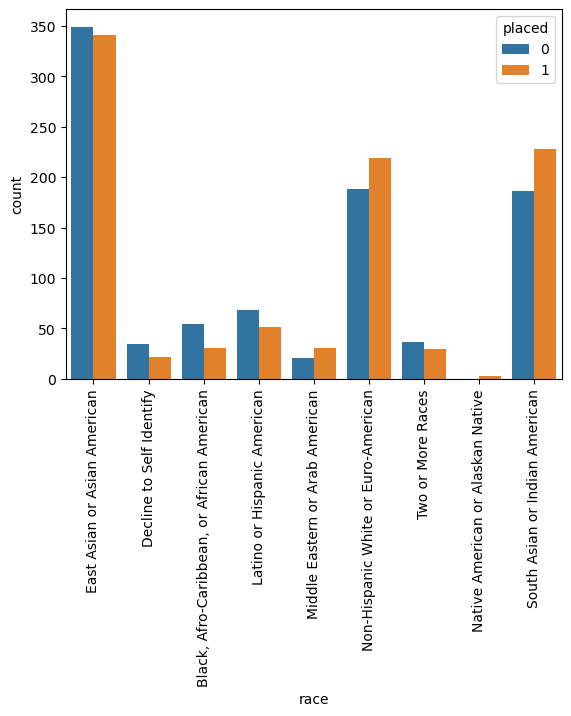

In [57]:
sns.countplot(x='race',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>cohort_tag_month<strong>

<strong>Replace missing values in the 'cohort_tag_month' column with 'JAN'.<strong>

In [58]:
df['cohort_tag_month'].value_counts()

JAN    305
OCT    232
SEP    220
AUG    203
FEB    177
DEC    137
JUN    128
NOV    117
APR    117
MAR    114
JUL     82
MAY     56
Name: cohort_tag_month, dtype: int64

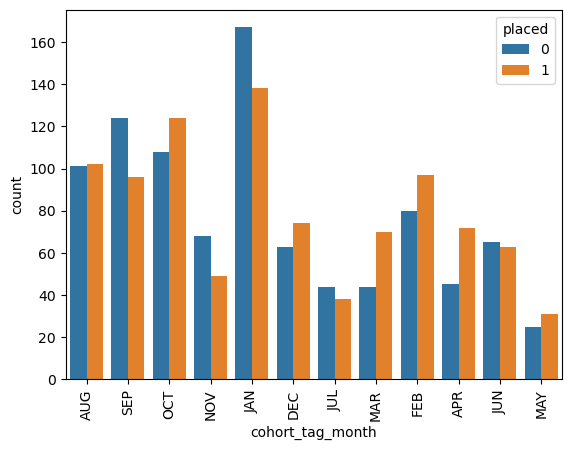

In [59]:
sns.countplot(x='cohort_tag_month',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

In [60]:
# Replace missing values in the 'cohort_tag_month' column with 'JAN'
df['cohort_tag_month'].replace(np.nan, "JAN", inplace=True)

# Count the number of occurrences of each value in the 'cohort_tag_month' column
value_counts = df['cohort_tag_month'].value_counts()
print(value_counts)

JAN    311
OCT    232
SEP    220
AUG    203
FEB    177
DEC    137
JUN    128
NOV    117
APR    117
MAR    114
JUL     82
MAY     56
Name: cohort_tag_month, dtype: int64


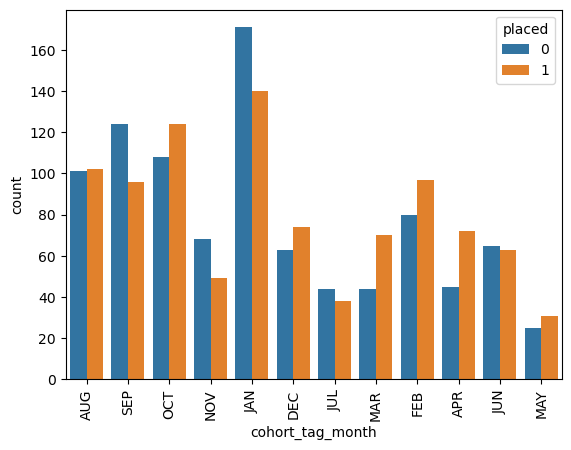

In [61]:
sns.countplot(x='cohort_tag_month',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>cohort_tag_fortnight<strong>

<strong>Replace missing values in the 'cohort_tag_month' column with 'A'.<strong>

In [62]:
df['cohort_tag_fortnight'].value_counts()

A    1148
B     634
C     104
a       2
Name: cohort_tag_fortnight, dtype: int64

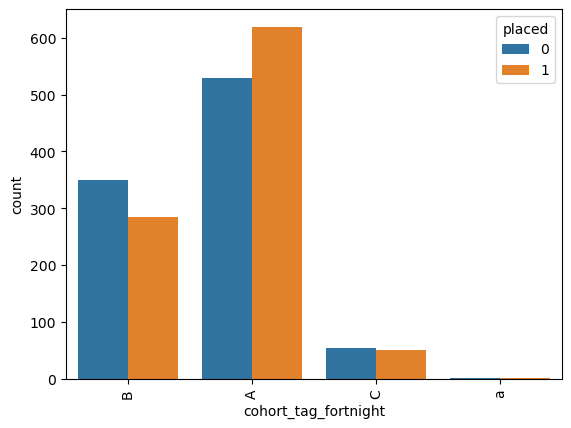

In [63]:
sns.countplot(x='cohort_tag_fortnight',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

In [64]:
# Replace missing values in the 'cohort_tag_month' column with 'A'
df['cohort_tag_fortnight'].replace(np.nan, "A", inplace=True)

# Count the number of occurrences of each value in the 'cohort_tag_month' column
value_counts = df['cohort_tag_fortnight'].value_counts()
print(value_counts)

A    1154
B     634
C     104
a       2
Name: cohort_tag_fortnight, dtype: int64


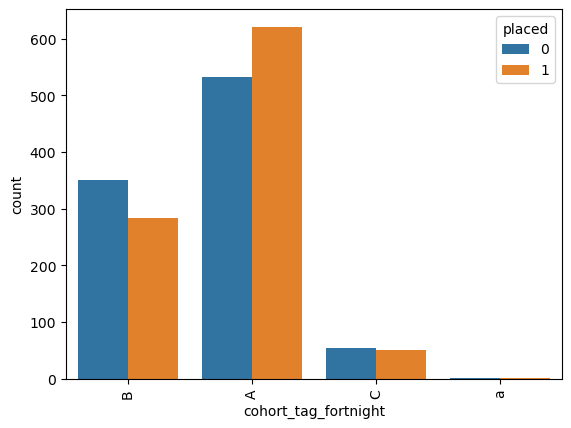

In [65]:
sns.countplot(x='cohort_tag_fortnight',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

<strong>number_of_interviews<strong>

<strong>Based on the data distribution of this column, it appears that this feature is not useful. Furthermore, due to the presence of missing values, this column was removed from the dataset.<strong>

<AxesSubplot:xlabel='number_of_interviews', ylabel='Density'>

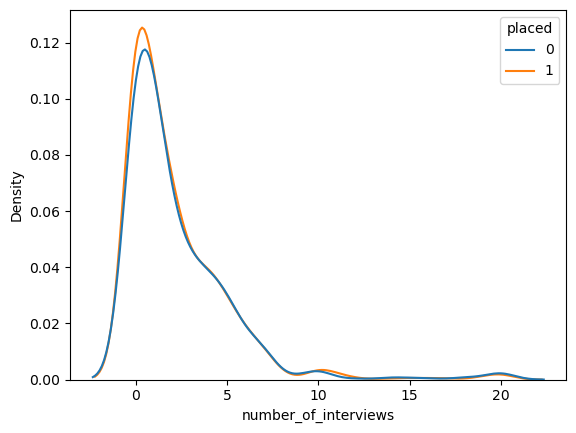

In [66]:
sns.kdeplot(data=df ,x='number_of_interviews', hue='placed')

In [67]:
df = df.drop('number_of_interviews', axis=1)


In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   primary_track                1894 non-null   object
 1   placed                       1894 non-null   int64 
 2   employment_status            1894 non-null   object
 3   highest_level_of_education   1894 non-null   object
 4   length_of_job_search         1894 non-null   object
 5   biggest_challenge_in_search  1894 non-null   object
 6   professional_experience      1894 non-null   object
 7   work_authorization_status    1894 non-null   object
 8   number_of_applications       1894 non-null   int64 
 9   gender                       1894 non-null   object
 10  race                         1894 non-null   object
 11  cohort_tag_month             1894 non-null   object
 12  cohort_tag_fortnight         1894 non-null   object
dtypes: int64(2), object(11)
memory us

In [69]:
df.isnull().sum()

primary_track                  0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_applications         0
gender                         0
race                           0
cohort_tag_month               0
cohort_tag_fortnight           0
dtype: int64

<strong>So far, no missing values remain in the dataset.<strong>

# Data Visualization

<strong>By examining the plots, the following information about the individuals who participated in the course can be obtained: The number of men was higher than women. Most of the participants had a bachelor's or master's degree. The majority of individuals had a software engineering specialty and had about 1-2 years of work experience. Most of these individuals were citizens or had student visas. The majority of participants were from East Asian or Asian-American backgrounds, followed by South Asian, Indian-American, and then European-American. The biggest challenge for most of these individuals was receiving negative or inappropriate responses to their requests.<strong>

In [70]:

category_columns=['primary_track','employment_status ','highest_level_of_education','length_of_job_search',
                 'biggest_challenge_in_search','professional_experience','work_authorization_status','gender',
                'race','cohort_tag_month','cohort_tag_fortnight' ]

numerical_columns=['number_of_applications']

<AxesSubplot:xlabel='number_of_applications', ylabel='Density'>

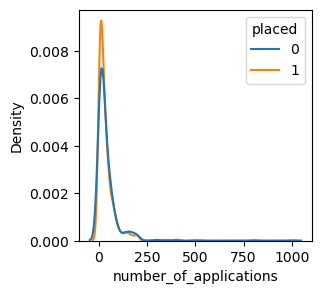

In [71]:
plt.figure(figsize=(3,3),dpi=100)
sns.kdeplot(data=df ,x='number_of_applications', hue='placed')


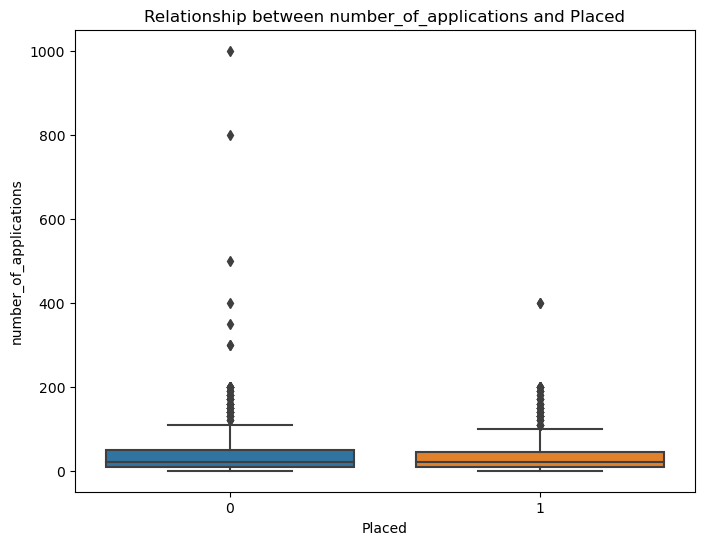

In [72]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='placed', y=col, data=df)
    plt.title(f'Relationship between {col} and Placed')
    plt.xlabel('Placed')
    plt.ylabel(col)
    plt.show()

In [73]:
df = df.drop('number_of_applications', axis=1)

<strong>Due to the data distribution in this column'number_of_applications', I have determined that it is better to remove it from the dataset.<strong>

In [74]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   primary_track                1894 non-null   object
 1   placed                       1894 non-null   int64 
 2   employment_status            1894 non-null   object
 3   highest_level_of_education   1894 non-null   object
 4   length_of_job_search         1894 non-null   object
 5   biggest_challenge_in_search  1894 non-null   object
 6   professional_experience      1894 non-null   object
 7   work_authorization_status    1894 non-null   object
 8   gender                       1894 non-null   object
 9   race                         1894 non-null   object
 10  cohort_tag_month             1894 non-null   object
 11  cohort_tag_fortnight         1894 non-null   object
dtypes: int64(1), object(11)
memory usage: 256.9+ KB


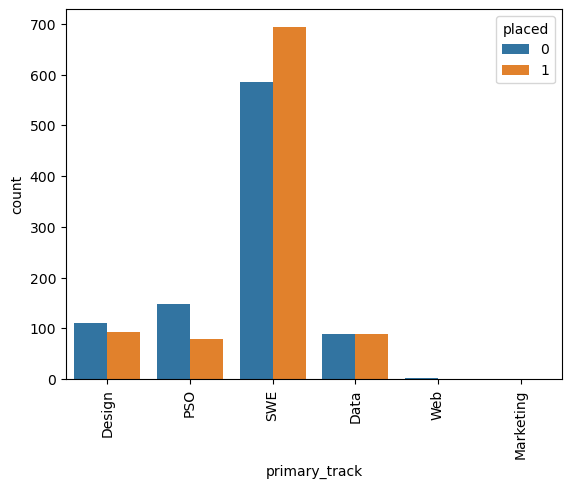

In [75]:
sns.countplot(x='primary_track',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

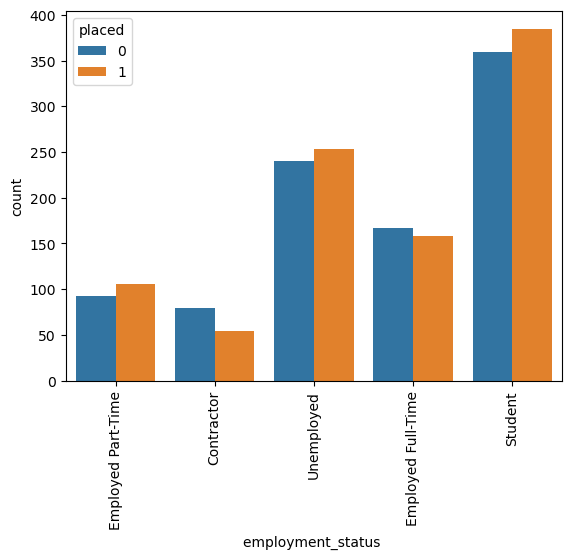

In [76]:
sns.countplot(x='employment_status ',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

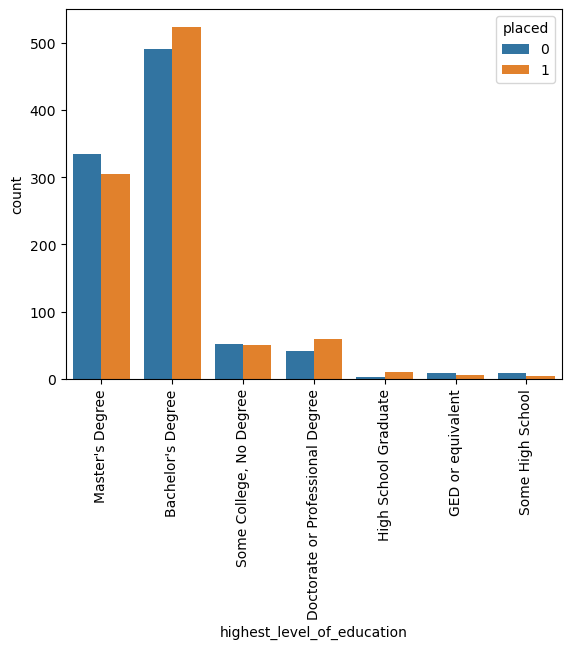

In [77]:
sns.countplot(x='highest_level_of_education', data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

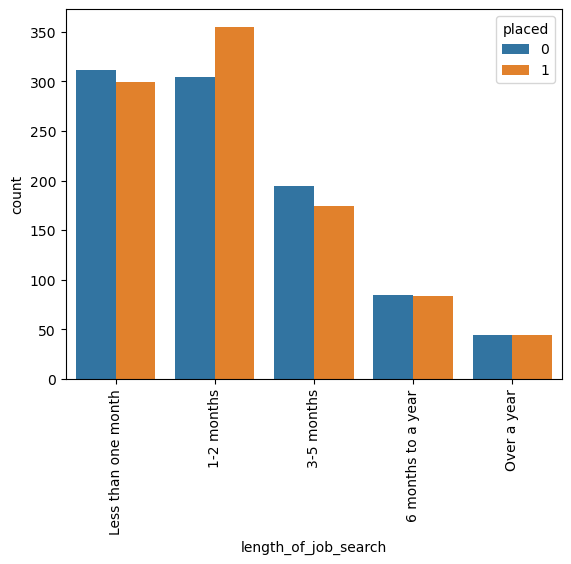

In [78]:
sns.countplot(x='length_of_job_search',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

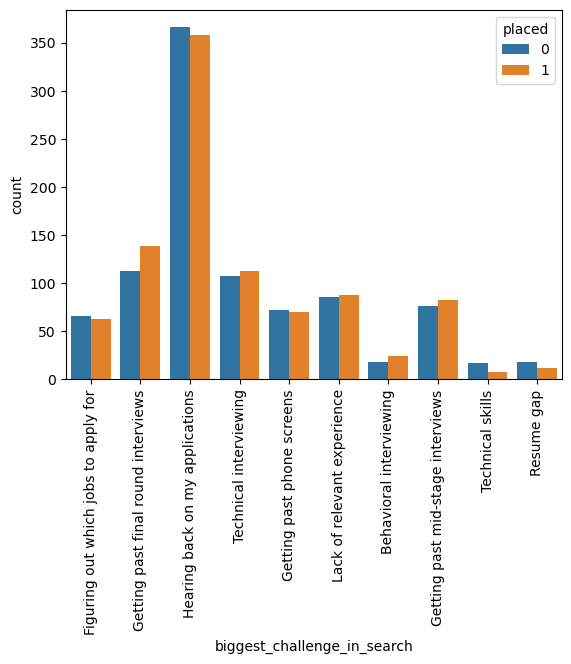

In [79]:
sns.countplot(x='biggest_challenge_in_search',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

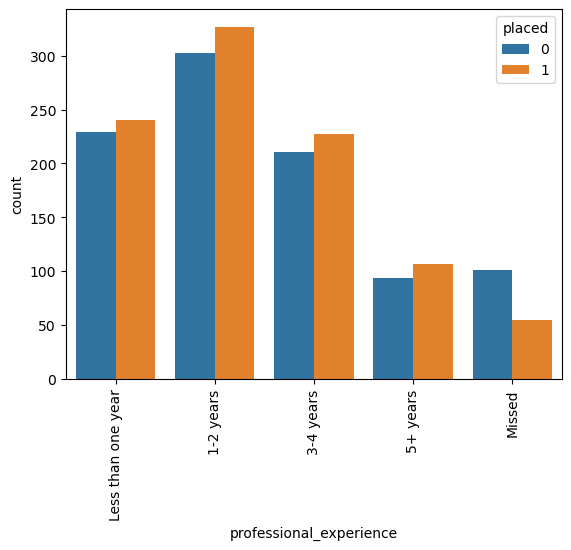

In [80]:
sns.countplot(x='professional_experience',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

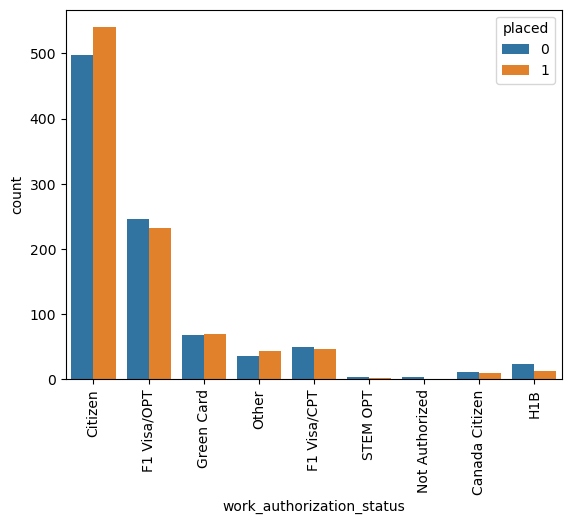

In [81]:
sns.countplot(x='work_authorization_status',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

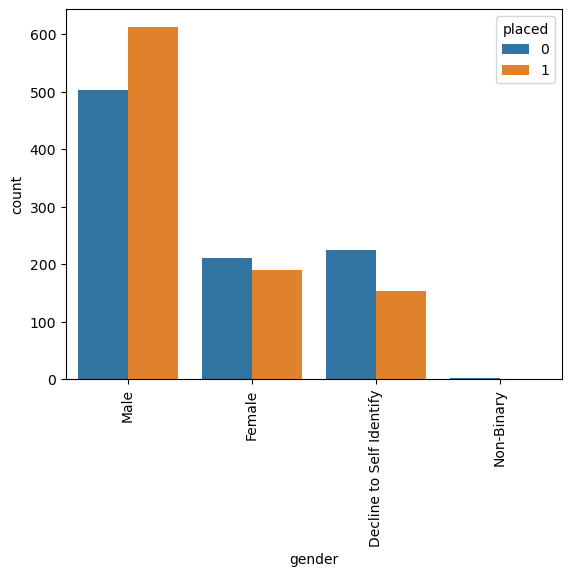

In [82]:
sns.countplot(x='gender',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

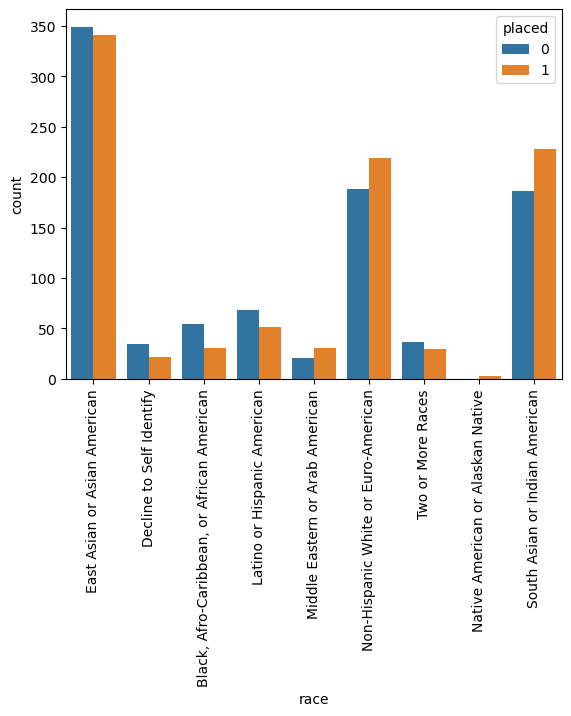

In [83]:
sns.countplot(x='race',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

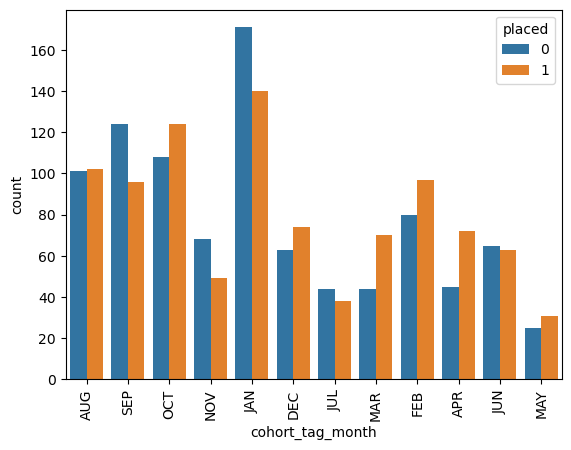

In [84]:
sns.countplot(x='cohort_tag_month',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

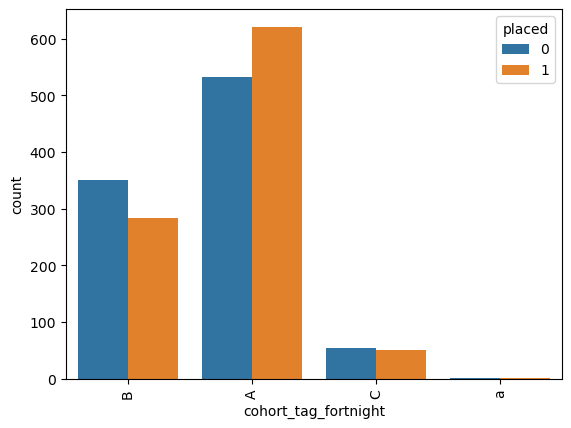

In [85]:
sns.countplot(x='cohort_tag_fortnight',data=df,hue='placed')
plt.xticks(rotation=90)
plt.show()

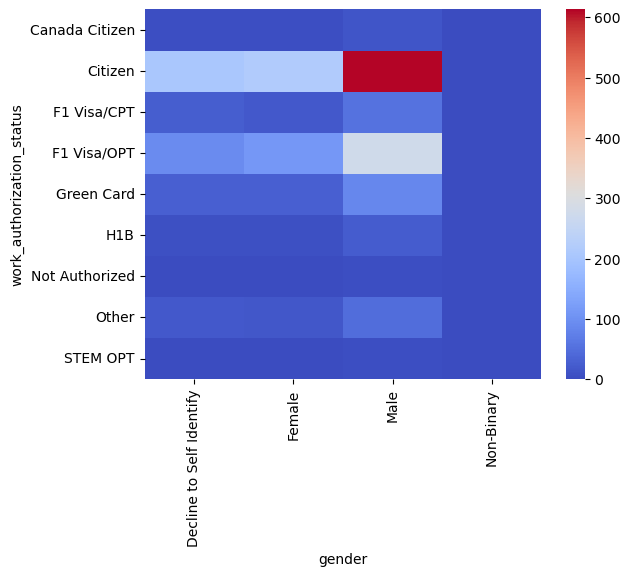

In [86]:
# assume col1 and col2 are two categorical columns
heatmap_data = pd.crosstab(df['work_authorization_status'], df['gender'])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

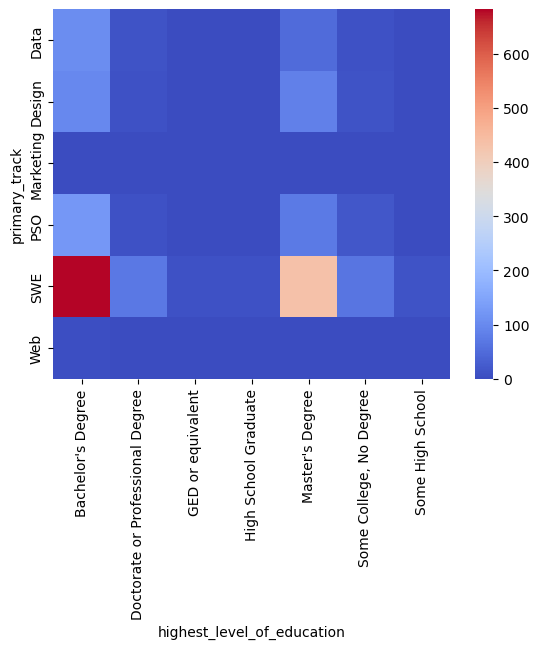

In [87]:
# assume col1 and col2 are two categorical columns
heatmap_data = pd.crosstab(df['primary_track'], df['highest_level_of_education'])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

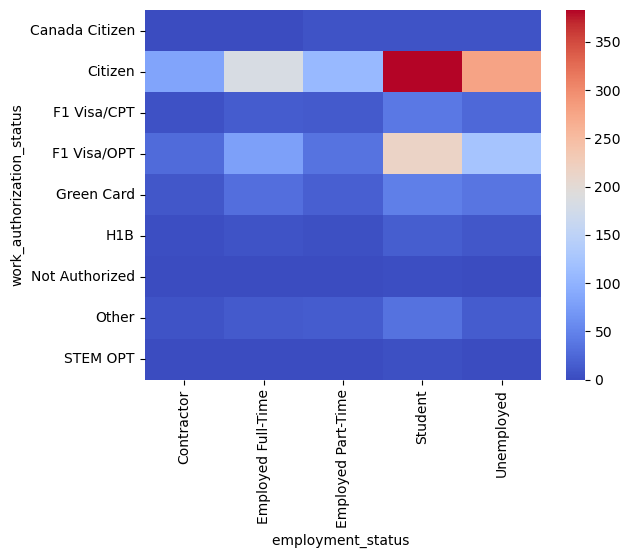

In [88]:
# assume col1 and col2 are two categorical columns
heatmap_data = pd.crosstab(df['work_authorization_status'], df['employment_status '])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

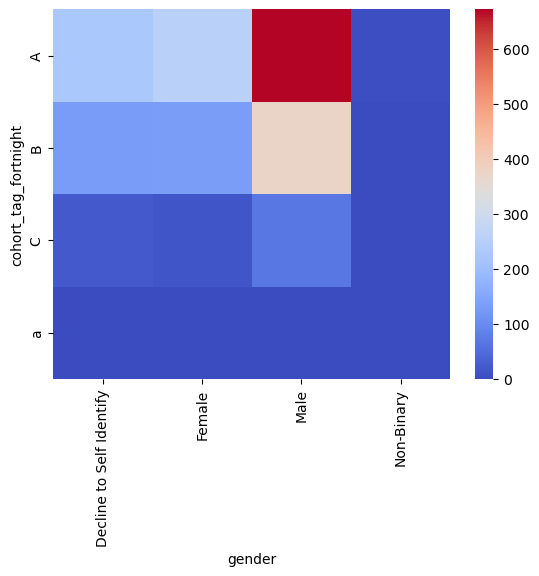

In [89]:
# assume col1 and col2 are two categorical columns
heatmap_data = pd.crosstab(df['cohort_tag_fortnight'], df['gender'])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

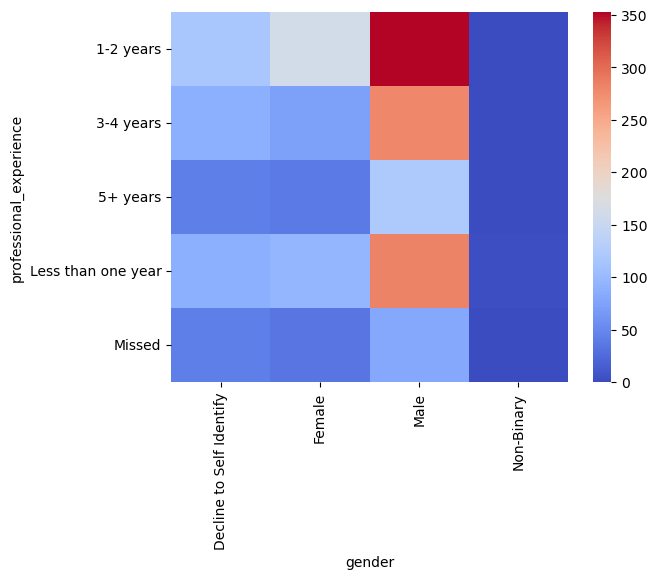

In [90]:
# assume col1 and col2 are two categorical columns
heatmap_data = pd.crosstab(df['professional_experience'], df['gender'])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

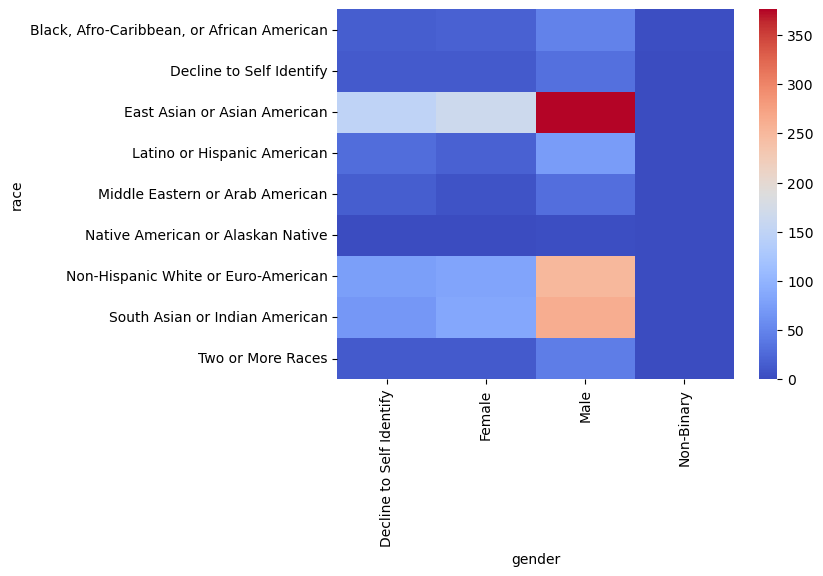

In [91]:
# assume col1 and col2 are two categorical columns
heatmap_data = pd.crosstab(df['race'], df['gender'])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

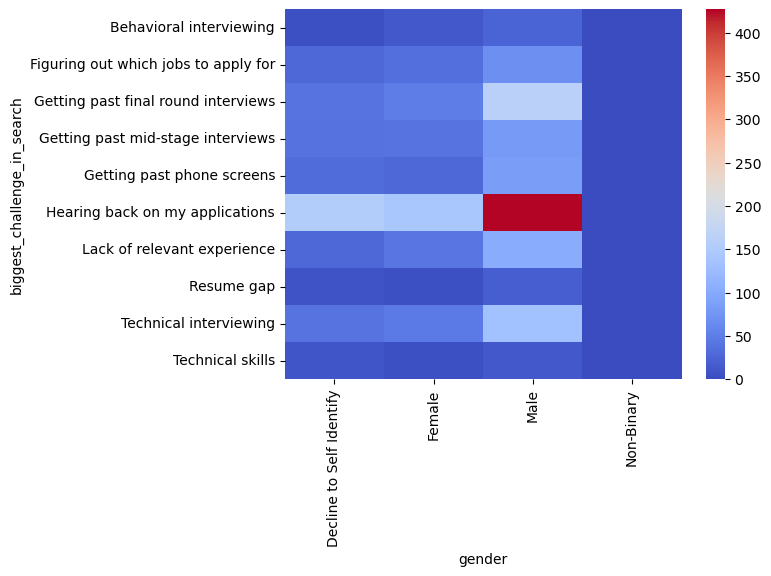

In [92]:
# assume col1 and col2 are two categorical columns
heatmap_data = pd.crosstab(df['biggest_challenge_in_search'], df['gender'])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

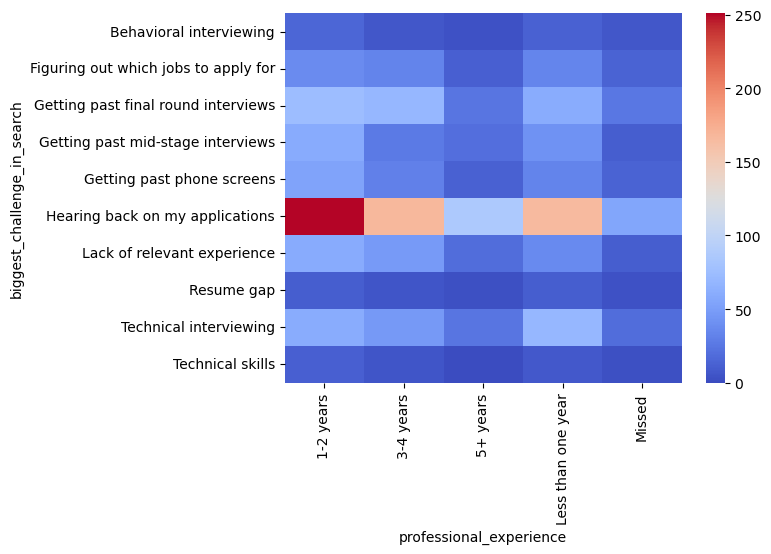

In [93]:
# assume col1 and col2 are two categorical columns
heatmap_data = pd.crosstab(df['biggest_challenge_in_search'], df['professional_experience'])
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.show()

# Data Labeling

In [94]:

from sklearn.preprocessing import LabelEncoder

# Assuming that the dataset is in a DataFrame called 'df'
category_columns=['primary_track','employment_status ','highest_level_of_education','length_of_job_search',
                 'biggest_challenge_in_search','professional_experience','work_authorization_status','gender',
                'race','cohort_tag_month','cohort_tag_fortnight']

# Create a copy of the DataFrame to avoid modifying the original data
df_encoded = df.copy()

# Encode the categorical variables using LabelEncoder
le = LabelEncoder()

# Encode each categorical column
for col in category_columns:
    if df_encoded[col].dtype == 'object':
        # Fill in any null values with a placeholder value
        df_encoded[col] = df_encoded[col].fillna('missing')
        # Fit the encoder on the column and transform the column
        df_encoded[col] = le.fit_transform(df_encoded[col])
    else:
        print(f"Column '{col}' is not an object dtype and cannot be encoded.")

# Check the data types of each column to confirm they're numeric
print(df_encoded.dtypes)




primary_track                  int32
placed                         int64
employment_status              int32
highest_level_of_education     int32
length_of_job_search           int32
biggest_challenge_in_search    int32
professional_experience        int32
work_authorization_status      int32
gender                         int32
race                           int32
cohort_tag_month               int32
cohort_tag_fortnight           int32
dtype: object


In [95]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   primary_track                1894 non-null   int32
 1   placed                       1894 non-null   int64
 2   employment_status            1894 non-null   int32
 3   highest_level_of_education   1894 non-null   int32
 4   length_of_job_search         1894 non-null   int32
 5   biggest_challenge_in_search  1894 non-null   int32
 6   professional_experience      1894 non-null   int32
 7   work_authorization_status    1894 non-null   int32
 8   gender                       1894 non-null   int32
 9   race                         1894 non-null   int32
 10  cohort_tag_month             1894 non-null   int32
 11  cohort_tag_fortnight         1894 non-null   int32
dtypes: int32(11), int64(1)
memory usage: 175.5 KB


In [96]:
df_encoded.describe()

,primary_track,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,gender,race,cohort_tag_month,cohort_tag_fortnight
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,3.183738,0.504752,2.601373,1.743928,1.524815,4.498416,1.515839,2.121964,1.392291,4.167371,5.527455,0.447730
std,1.386307,0.500109,1.235168,2.019556,1.367175,2.099417,1.380382,1.573490,0.800002,2.424556,3.603285,0.603006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,2.000000,3.000000,0.000000
50%,4.000000,1.000000,3.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,3.000000,5.000000,0.000000
75%,4.000000,1.000000,4.000000,4.000000,3.000000,5.000000,3.000000,3.000000,2.000000,7.000000,9.000000,1.000000
max,5.000000,1.000000,4.000000,6.000000,4.000000,9.000000,4.000000,8.000000,3.000000,8.000000,11.000000,3.000000


# correlation heatmap to visualize the correlations between features

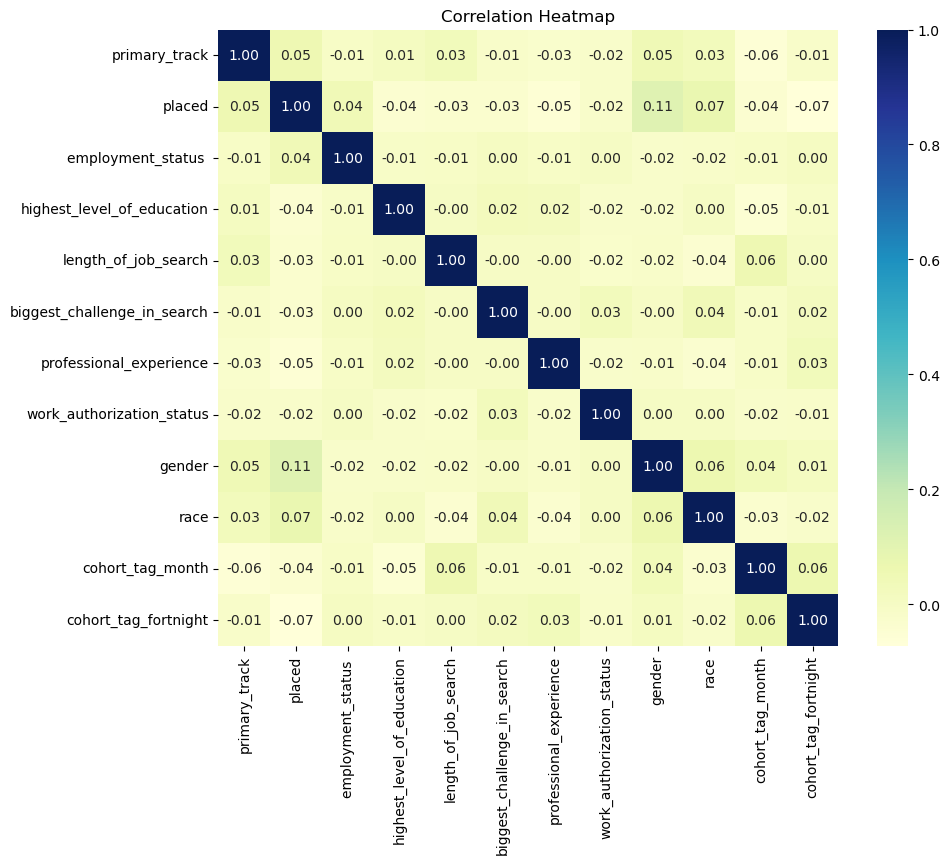

In [97]:
# Set the style of the plot
sns.set_style(style=None, rc=None)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Compute the correlation matrix for the encoded dataframe
corr_matrix = df_encoded.corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", ax=ax)

# Set the title of the plot
ax.set_title("Correlation Heatmap")

# Display the plot
plt.show()


<AxesSubplot:xlabel='placed', ylabel='count'>

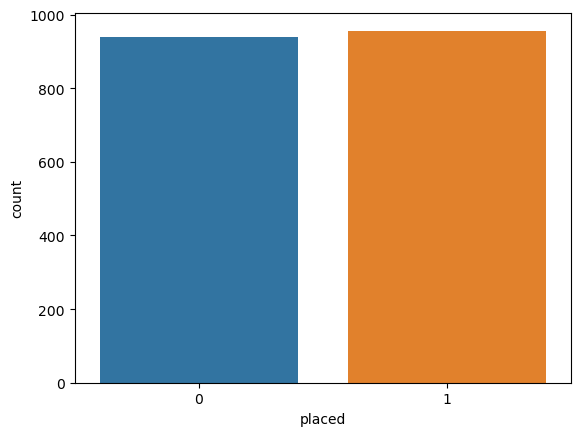

In [98]:
#To check the dataset balance
sns.countplot(x='placed',data=df_encoded)

In [99]:
df_encoded.to_csv('Pathrise_preprocessed.csv', index=False)

<strong> The dataset was thoroughly cleaned, with missing values and outliers removed, and any unnecessary information eliminated.Finally, a balanced dataset was prepared for use in machine-learning models.<strong>

# Modeling

# Import necessary libraries:

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


# Load dataset:

In [101]:
df = pd.read_csv('Pathrise_preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   primary_track                1894 non-null   int64
 1   placed                       1894 non-null   int64
 2   employment_status            1894 non-null   int64
 3   highest_level_of_education   1894 non-null   int64
 4   length_of_job_search         1894 non-null   int64
 5   biggest_challenge_in_search  1894 non-null   int64
 6   professional_experience      1894 non-null   int64
 7   work_authorization_status    1894 non-null   int64
 8   gender                       1894 non-null   int64
 9   race                         1894 non-null   int64
 10  cohort_tag_month             1894 non-null   int64
 11  cohort_tag_fortnight         1894 non-null   int64
dtypes: int64(12)
memory usage: 177.7 KB


# Define X and y:

In [102]:
X = df.drop('placed', axis=1)
y = df['placed']


# Split data into training and testing sets:

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# Feature scaling:

In [104]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Model selection:

In [105]:
# Define classifiers
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

# Define parameter grids for GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9]}
param_grid_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, 9]}
param_grid_lr = {'C': [0.1, 1, 10]}

# Perform GridSearchCV for each classifier
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=10)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=10)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=10)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=10)

# Fit the models
grid_knn.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)




D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [106]:

# Print best hyperparameters for each model
print('Best hyperparameters for KNN:', grid_knn.best_params_)
print('Best hyperparameters for SVM:', grid_svm.best_params_)
print('Best hyperparameters for DT:', grid_dt.best_params_)
print('Best hyperparameters for RF:', grid_rf.best_params_)
print('Best hyperparameters for LR:', grid_lr.best_params_)

Best hyperparameters for KNN: {'n_neighbors': 3}
Best hyperparameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
Best hyperparameters for DT: {'criterion': 'entropy', 'max_depth': 3}
Best hyperparameters for RF: {'max_depth': 3, 'n_estimators': 100}
Best hyperparameters for LR: {'C': 0.1}


# Fit the models with best hyperparameters

In [107]:
knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
svm = SVC(C=grid_svm.best_params_['C'], kernel=grid_svm.best_params_['kernel'])
dt = DecisionTreeClassifier(criterion=grid_dt.best_params_['criterion'], max_depth=grid_dt.best_params_['max_depth'])
rf = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'])
lr = LogisticRegression(C=grid_lr.best_params_['C'])

In [108]:

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:

svm.fit(X_train, y_train)

SVC(C=0.1)

In [110]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [111]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [112]:

lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

# Evaluate the models

In [113]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

# your code using KNN algorithm



## Initializing models, model_names and evaluation metrics
models = [knn, svm, dt, rf, lr]
model_names = ['KNN', 'SVM', 'DT', 'RF', 'LR']
accuracies = []
confusion_matrices = []
fprs = []
tprs = []
aucs = []

## Loop through models to make predictions using each model
for model in models:
    y_pred = model.predict(X_test)
    ## store evaluation metrics of each model
    accuracies.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc(fpr, tpr))




Model: KNN
Accuracy Score: 0.54


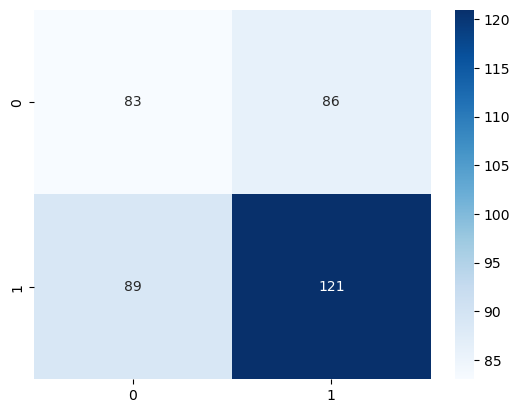

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       169
           1       0.58      0.58      0.58       210

    accuracy                           0.54       379
   macro avg       0.53      0.53      0.53       379
weighted avg       0.54      0.54      0.54       379
 

Model: SVM
Accuracy Score: 0.56


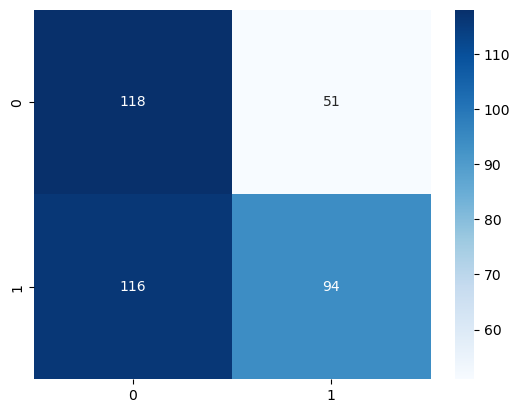

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.70      0.59       169
           1       0.65      0.45      0.53       210

    accuracy                           0.56       379
   macro avg       0.58      0.57      0.56       379
weighted avg       0.58      0.56      0.55       379
 

Model: DT
Accuracy Score: 0.54


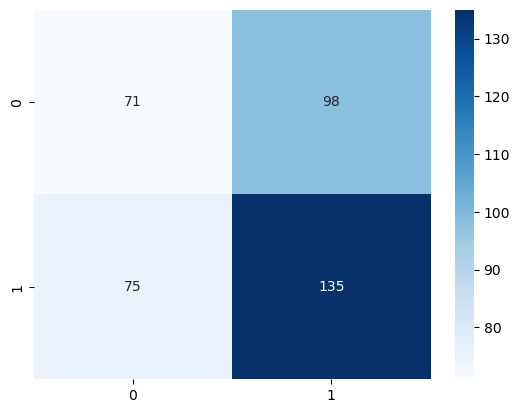

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       169
           1       0.58      0.64      0.61       210

    accuracy                           0.54       379
   macro avg       0.53      0.53      0.53       379
weighted avg       0.54      0.54      0.54       379
 

Model: RF
Accuracy Score: 0.57


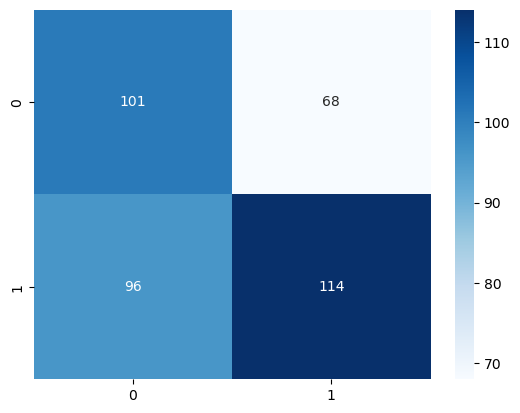

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       169
           1       0.63      0.54      0.58       210

    accuracy                           0.57       379
   macro avg       0.57      0.57      0.57       379
weighted avg       0.58      0.57      0.57       379
 

Model: LR
Accuracy Score: 0.53


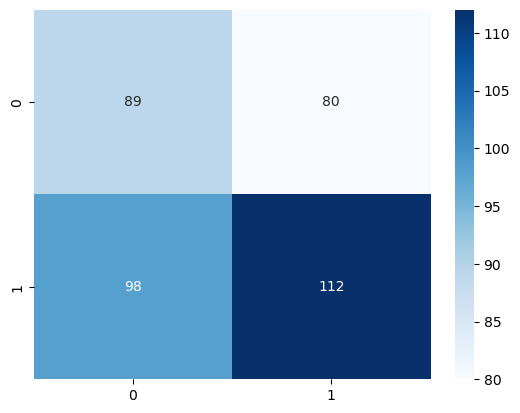

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.53      0.50       169
           1       0.58      0.53      0.56       210

    accuracy                           0.53       379
   macro avg       0.53      0.53      0.53       379
weighted avg       0.54      0.53      0.53       379
 



In [115]:
import seaborn as sns
from sklearn.metrics import classification_report

for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    print(f"Accuracy Score: {accuracies[i]:.2f}")
    sns.heatmap(confusion_matrices[i], annot=True, cmap="Blues", fmt='d')
    plt.show()
    y_pred = models[i].predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred), "\n")




C:\Users\Elham\AppData\Local\Temp\ipykernel_11604\3058899082.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color="red")


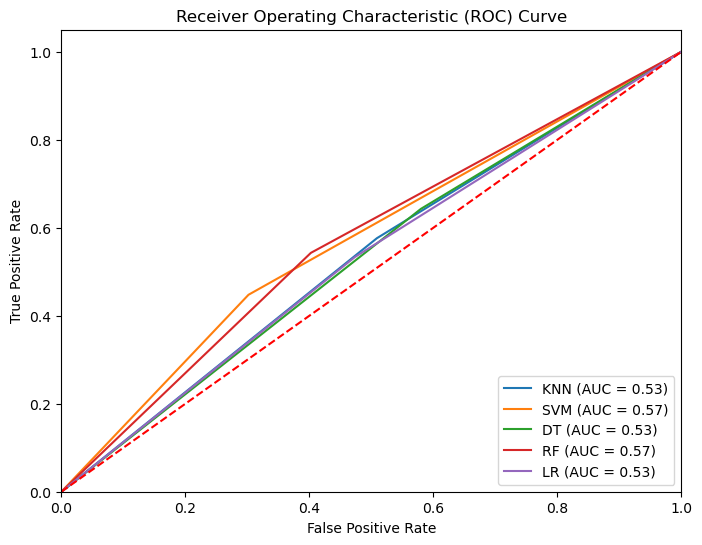

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for i in range(len(models)):
    plt.plot(fprs[i], tprs[i], label=model_names[i] + " (AUC = {:.2f})".format(aucs[i]))
plt.plot([0, 1], [0, 1], 'k--', color="red")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
